In [14]:
# import yfinance as yf
import time
# import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [16]:
df = yf.download('LT.NS', start = '2020-01-01')
df


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,LT.NS,LT.NS,LT.NS,LT.NS,LT.NS
Date,,,,,
2020-01-01,1195.268799,1203.435327,1188.927290,1193.854562,3123998
2020-01-02,1227.524170,1229.987751,1196.226959,1197.139413,4335359
2020-01-03,1218.171387,1227.204589,1213.700341,1227.204589,2059871
2020-01-06,1201.473389,1215.388307,1199.055364,1214.475854,2646905
2020-01-07,1204.895142,1222.231762,1198.736079,1211.738545,2077893
...,...,...,...,...,...
2025-02-04,3439.149902,3449.000000,3307.250000,3316.000000,4742516
2025-02-05,3383.199951,3450.949951,3379.449951,3444.649902,2670316


In [17]:
df.columns = ['_'.join(col).strip() for col in df.columns.values]
df.columns = [col.split('_')[0] for col in df.columns]
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-01,1195.268799,1203.435327,1188.927290,1193.854562,3123998
2020-01-02,1227.524170,1229.987751,1196.226959,1197.139413,4335359
2020-01-03,1218.171387,1227.204589,1213.700341,1227.204589,2059871
2020-01-06,1201.473389,1215.388307,1199.055364,1214.475854,2646905
2020-01-07,1204.895142,1222.231762,1198.736079,1211.738545,2077893
...,...,...,...,...,...
2025-02-04,3439.149902,3449.000000,3307.250000,3316.000000,4742516
2025-02-05,3383.199951,3450.949951,3379.449951,3444.649902,2670316
2025-02-06,3352.750000,3404.000000,3342.699951,3404.000000,2874856


In [18]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.lower()
df = df.reset_index()['close']
df

0       1195.268799
1       1227.524170
2       1218.171387
3       1201.473389
4       1204.895142
           ...     
1263    3439.149902
1264    3383.199951
1265    3352.750000
1266    3336.899902
1267    3314.500000
Name: close, Length: 1268, dtype: float64

In [19]:
df1 = pd.DataFrame(df).to_numpy()
actual_value =df1[-1][0]
actual_value

np.float64(3314.5)

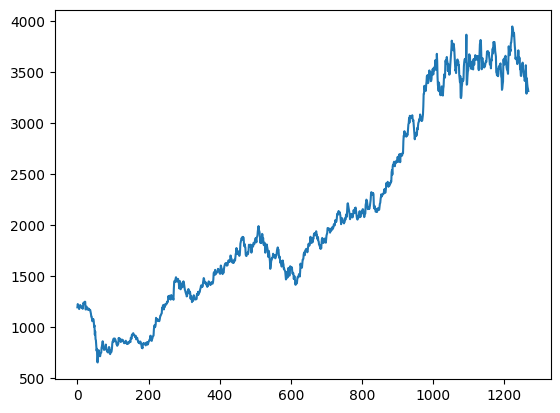

In [20]:
plt.plot(df)

In [21]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler
scaler=MinMaxScaler (feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [22]:
df

array([[0.16410781],
       [0.17390495],
       [0.17106417],
       ...,
       [0.81941348],
       [0.81459923],
       [0.80779556]])

In [23]:
training_size=int(len(df)*0.8)
test_size=len (df)-training_size
train_data, test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [24]:
training_size, test_size

(1014, 254)

In [25]:
# creating 60(or whatever you decided) batches
import numpy
# convert an array of values into a dataset matrix
def create_dataset (dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [26]:
# reshape into X=t,t+1, t+2, t+3 and Y=t+4
time_step=60

X_train, y_train = create_dataset (train_data, time_step)
X_test, y_test = create_dataset (test_data, time_step)


In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [28]:
model=Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(time_step,1)))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

d:\work\Anunay\MBA_Project\.env\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 60, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,617 (967.25 KB)

 Trainable params: 247,617 (967.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose=1)

In [29]:
from keras.models import load_model

In [30]:
model = load_model('Model/LT_Pred_model.h5')

In [ ]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

1862.6728196263912

In [34]:
math.sqrt(mean_squared_error(y_test, test_predict))

3591.5235012328258

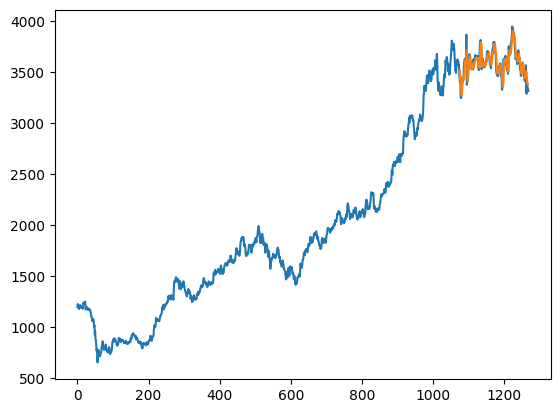

In [36]:
### Plotting
# shift train predictions for plotting
look_back=time_step
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot [look_back: len(train_predict) +look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
# plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

NameError: name 'temp_input' is not defined

In [76]:
df=scaler.fit_transform(np.array(df).reshape(-1,1))
x_input = df[-62:-2].reshape(1,-1)
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [77]:
lst_output=[]
n_steps=time_step
i=0
while(i<1):
    if(len(temp_input)>time_step):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
yhat=scaler.inverse_transform(yhat)

[-0.06438077]
61


In [79]:
print(yhat )

[[-0.06438077]]


In [80]:
pred_val=scaler.inverse_transform(yhat)

In [81]:
pred_val

array([[-0.06438077]], dtype=float32)